In [16]:
import numpy as np
import pandas as pd
from copy import deepcopy

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib

print("requirements.txt")
print("numpy=={}".format(np.__version__))
print("pandas=={}".format(pd.__version__))

Using matplotlib backend: Qt5Agg
requirements.txt
numpy==1.15.1
pandas==0.23.4


In [3]:
dframe = pd.read_csv("2019-Winter-Data-Science-Intern-Challenge-Data-Set.csv")

dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.5+ KB


In [4]:
dframe.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [6]:
total_items = dframe['total_items'].values
order_amount = dframe['order_amount'].values

print("\n")
print("Q: How many shops are there?")
print("A: There are {} different shops.".format(
    len(set(dframe['shop_id']))))
print("Q: How many users are there?")
print("A: There are {} different users.".format(
    len(set(dframe['user_id']))))

payment_method = list(set(dframe['payment_method']))
print("Q: How many payment methods are there?")
print("A: There are {} methods to pay for merchandises, "
      "including {}, and {}.".format(
          len(payment_method),
          ', '.join(payment_method[:-1]),
          payment_method[-1]))



Q: How many shops are there?
A: There are 100 different shops.
Q: How many users are there?
A: There are 301 different users.
Q: How many payment methods are there?
A: There are 3 methods to pay for merchandises, including debit, cash, and credit_card.


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


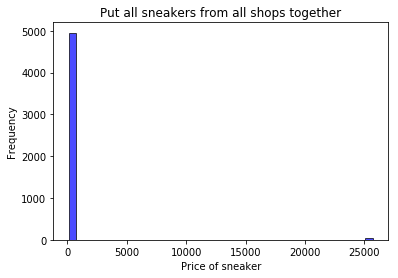

In [9]:
def plot_all_together(data):
    plt.hist(data, bins=40, normed=0, facecolor='blue', edgecolor='black', alpha=.7)
    plt.xlabel('Price of sneaker')
    plt.ylabel('Frequency')
    plt.title('Put all sneakers from all shops together')
    plt.show()
    return

plot_all_together(order_amount / total_items)

In [10]:
diff_shops = sorted(set(dframe['shop_id']))
diff_price = []
diff_numbr = []
diff_total_items = []
diff_total_amoun = []

for i in diff_shops:
    subdf = dframe[dframe['shop_id'] == i]

    sub_order = subdf['order_amount'].values
    sub_items = subdf['total_items'].values
    sub_price = sub_order / sub_items
    assert len(set(sub_price)) == 1
    sub_price = list(set(sub_price))[0]

    print("Shop #{:3d}: sneaker price is {}.".format(
        i, sub_price), end="")
    print("\tThere are {:2d} orders and {:3d} sold items in total.".format(
        len(sub_order), np.sum(sub_items)))

    diff_price.append(sub_price)
    diff_numbr.append(len(sub_order))
    diff_total_items.append(np.sum(sub_items))
    diff_total_amoun.append(np.sum(sub_order))

Shop #  1: sneaker price is 158.0.	There are 44 orders and  86 sold items in total.
Shop #  2: sneaker price is 94.0.	There are 55 orders and 102 sold items in total.
Shop #  3: sneaker price is 148.0.	There are 48 orders and  99 sold items in total.
Shop #  4: sneaker price is 128.0.	There are 51 orders and 103 sold items in total.
Shop #  5: sneaker price is 142.0.	There are 45 orders and  92 sold items in total.
Shop #  6: sneaker price is 187.0.	There are 59 orders and 121 sold items in total.
Shop #  7: sneaker price is 112.0.	There are 56 orders and 109 sold items in total.
Shop #  8: sneaker price is 132.0.	There are 46 orders and  84 sold items in total.
Shop #  9: sneaker price is 118.0.	There are 59 orders and 117 sold items in total.
Shop # 10: sneaker price is 148.0.	There are 53 orders and 119 sold items in total.
Shop # 11: sneaker price is 184.0.	There are 49 orders and  95 sold items in total.
Shop # 12: sneaker price is 201.0.	There are 53 orders and  93 sold items in 

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


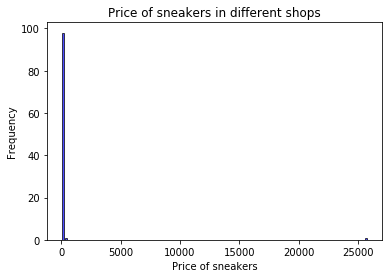

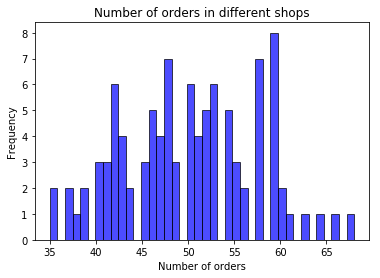

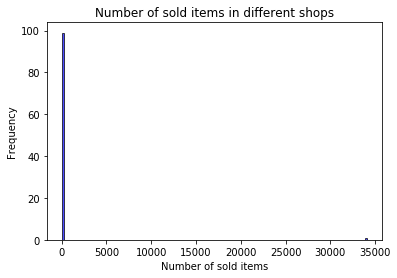

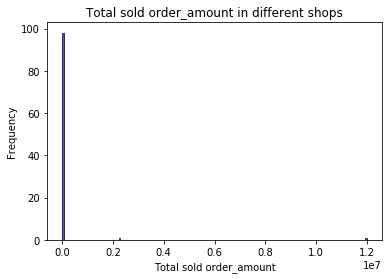

In [14]:
def subplot_different_shops(data, bins, text):
    plt.hist(data, bins=bins, normed=0, facecolor='blue',
             edgecolor='black', alpha=.7)
    plt.xlabel(text)
    plt.ylabel('Frequency')
    plt.title('{} in different shops'.format(text))
    plt.show()
    return


subplot_different_shops(diff_price, 200, 'Price of sneakers')
subplot_different_shops(diff_numbr, 40, 'Number of orders')
subplot_different_shops(diff_total_items, 200, 'Number of sold items')
subplot_different_shops(diff_total_amoun, 200, 'Total sold order_amount')

In [18]:
copy_shops = deepcopy(diff_shops)
copy_price = deepcopy(diff_price)
copy_numbr = deepcopy(diff_numbr)
copy_total_items = deepcopy(diff_total_items)
copy_total_amoun = deepcopy(diff_total_amoun)

outlier_idx = copy_price.index(max(copy_price))
print("\n\n")
print("The outlier is the shop #{}, selling the sneaker with the price"
      " of ${}. There are {} items sold in {} orders, and the total amount"
      " is ${}.".format(diff_shops[outlier_idx], diff_price[outlier_idx],
                        copy_total_items[outlier_idx], copy_numbr[outlier_idx],
                        copy_total_amoun[outlier_idx]))


del copy_shops[outlier_idx]
del copy_price[outlier_idx]
del copy_numbr[outlier_idx]
del copy_total_items[outlier_idx]
del copy_total_amoun[outlier_idx]


def subplot_different_shops_without_outliers(data, text):
    plt.hist(data, bins=40, normed=0, facecolor='blue',
             edgecolor='black', alpha=.7)
    plt.xlabel(text)
    plt.ylabel('Frequency')
    plt.title('{} in different shops without outliers'.format(text))
    plt.show()
    return


subplot_different_shops_without_outliers(copy_price, 'Price of sneakers')
subplot_different_shops_without_outliers(copy_numbr, 'Number of orders')
subplot_different_shops_without_outliers(copy_total_items, 'Number of sold items')
subplot_different_shops_without_outliers(copy_total_amoun, 'Total sold order_amount')




The outlier is the shop #78, selling the sneaker with the price of $25725.0. There are 88 items sold in 46 orders, and the total amount is $2263800.


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
